In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dataset Description
his dataset contains job postings information with the following columns:

* job_title: The title or position name of the job listing. It includes the specific job role or title, such as "Data Scientist" or "Software Engineer".
* company_name: The name of the company or organization offering the job. This includes both well-known companies and lesser-known organizations.
* job_type: The type of employment or job arrangement. Examples include "Full-time", "Part-time", "Contract", or "Internship".
* exp_level: The required or preferred level of experience for the job. Typical categories are "Entry Level", "Mid Level", "Senior Level", etc.
* exp_years: The number of years of experience required for the job. This column contains categorical data indicating ranges of experience, such as "1 - 3 Yrs of Exp". Note that some entries may be missing.
* skills: A description of the skills and qualifications necessary for the job. This may include technical skills, certifications, and other competencies relevant to the job role.
* posted: The date or time frame when the job listing was posted or became active. This column includes information such as " 18 hours ago", "2 days ago".
* area: The specific area or region where the job is located.
* city: The city where the job is located. 
* country: The country where the job is located. 
* job_state: The current state or status of the job (e.g., open, closed). 
* job_category: The broader category of the job title after mapping specific job titles to broader categories. 


In [297]:
# reading the file
df=pd.read_csv(r"C:\Users\Magic\Downloads\WUZZUF_finall.csv",index_col="Unnamed: 0")

In [298]:
#explore the data
df.head()

,job_title,company_name,area,city,country,job_type,job_state,exp_level,exp_years,job_category,skills,posted
0,AI Data Science and Machine Learning Instructor,CLS Learning Solutions,Dokki,Giza,Egypt,Part Time,On-site,Experienced,3 - 15 Yrs of Exp,Training/Instructor,Deep Learning Data Science Python Natural Lang...,10 days ago
1,Machine Learning Engineer,StreetScan,New Cairo,Cairo,Egypt,Part Time,On-site,Experienced,7 - 11 Yrs of Exp,IT/Software Development,Computer Science Programming Python TensorFlow...,16 days ago
2,Machine Learning Engineer,WUZZUF,Maadi,Cairo,Egypt,Part Time,On-site,Experienced,2 - 4 Yrs of Exp,IT/Software Development,Python ElasticSearch Machine Learning Web Deve...,1 month ago
3,Machine Learning Engineer,Softec Technologies,Not mentioned,Cairo,Egypt,Part Time,On-site,Experienced,4 - 8 Yrs of Exp,R&D/Science,Computer Science Computer Vision Deep Learning...,2 months ago
4,Senior AI Engineer,Lumin,Sheikh Zayed,Giza,Egypt,Part Time,On-site,Experienced,3 - 5 Yrs of Exp,IT/Software Development,Computer Vision Machine Learning TensorFlow Py...,1 hour ago


In [299]:
# we noticed that there are data types need to be converted and skills,area,job_state , exp_years have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193 entries, 0 to 5192
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     5193 non-null   object
 1   company_name  5193 non-null   object
 2   area          5193 non-null   object
 3   city          5193 non-null   object
 4   country       5193 non-null   object
 5   job_type      5193 non-null   object
 6   job_state     5193 non-null   object
 7   exp_level     5193 non-null   object
 8   exp_years     3004 non-null   object
 9   job_category  5193 non-null   object
 10  skills        5071 non-null   object
 11  posted        5193 non-null   object
dtypes: object(12)
memory usage: 527.4+ KB


In [300]:
df.describe(include='O')
# we noticed that most of jos are of type full time
# half of jobs need to be experienced and on site

,job_title,company_name,area,city,country,job_type,job_state,exp_level,exp_years,job_category,skills,posted
count,5193,5193,5193,5193,5193,5193,5193,5193,3004,5193,5071,5193
unique,3206,1973,123,70,20,4,4,6,108,68,3922,74
top,Graphic Designer,Confidential,Not mentioned,Cairo,Egypt,Full Time,On-site,Experienced,3 - 5 Yrs of Exp,IT/Software Development,Administration Microsoft Office Admin Typing C...,2 months ago
freq,58,484,2469,2245,3407,4948,2771,2844,427,1186,142,769


In [301]:
df.isna().sum()/len(df) # 42% of exp_years is null we can drop it or impute it with KNN imputer&2% of skills is null

job_title       0.000000
company_name    0.000000
area            0.000000
city            0.000000
country         0.000000
job_type        0.000000
job_state       0.000000
exp_level       0.000000
exp_years       0.421529
job_category    0.000000
skills          0.023493
posted          0.000000
dtype: float64

In [302]:
df.duplicated().sum()

143

In [303]:
df.drop_duplicates(inplace=True)

In [304]:
df.duplicated().sum()

0

# Data Cleaning

## Job_name Column

In [305]:
df['job_title'].unique()[:150]
# i noticed that there are names that arn't clean so i'll split it and take the first element 
#like(Senior Graphic Designer / Video editor ( Full Time ) - Nasr City)

array(['AI Data Science and Machine Learning Instructor',
       'Machine Learning Engineer', 'Senior AI Engineer', 'AI Engineer',
       'Senior Developer - Enterprise Software',
       'Second Level Technical Support Engineer',
       'AI and Robotics Instructor', 'DevOps Engineer',
       'Graduate Internship: Enterprise Software Engineering',
       'AI Intern', 'Learning & Development Management Supervisor',
       'AI Engineer - Saudi Arabia', 'AI Engineer - UAE',
       'Senior Data Scientist - 1 year FTC - Saudi Arabia relocation',
       'Data Scientist', 'Junior Data Scientist (Remote)',
       'Python Data Scientist (Quantitative Finance)',
       'Jr. Data Scientist', 'AI Specialist',
       'Senior Cost Accountant (Manufacturing Industry)',
       'Injection intern', 'Mold intern', 'junior ML JD',
       'Full-Stack Python Team Leader (Django/React)',
       'Full-Stack Team Leader (Django/React)',
       'Senior Backend Developer', 'Cnc sheet metal maintenance engineer',


In [306]:
df['job_title']=df['job_title'].apply(lambda x: x.split(' - ')[0])
# split the name to extract the name of the jobs only

In [307]:
df['job_title'].unique()[:100] # check it

array(['AI Data Science and Machine Learning Instructor',
       'Machine Learning Engineer', 'Senior AI Engineer', 'AI Engineer',
       'Senior Developer', 'Second Level Technical Support Engineer',
       'AI and Robotics Instructor', 'DevOps Engineer',
       'Graduate Internship: Enterprise Software Engineering',
       'AI Intern', 'Learning & Development Management Supervisor',
       'Senior Data Scientist', 'Data Scientist',
       'Junior Data Scientist (Remote)',
       'Python Data Scientist (Quantitative Finance)',
       'Jr. Data Scientist', 'AI Specialist',
       'Senior Cost Accountant (Manufacturing Industry)',
       'Injection intern', 'Mold intern', 'junior ML JD',
       'Full-Stack Python Team Leader (Django/React)',
       'Full-Stack Team Leader (Django/React)',
       'Senior Backend Developer', 'Cnc sheet metal maintenance engineer',
       'Senior python backend developer.', 'Shop Floor Manager',
       'Data/Artificial Intelligence Sr. Consultant',
       

i decided to reduce the job_category column from 68 unique values to 17 based on job_title column

In [308]:
import re

def categorize_job(job_title):
    job_title = job_title.lower()
    
    # AI and Machine Learning
    if any(keyword in job_title for keyword in ['ai', 'artificial intelligence', 'machine learning', 'ml']):
        return 'AI and Machine Learning'
    
    # Data Science and Analytics
    elif any(keyword in job_title for keyword in ['data scientist', 'data analyst', 'analytics']):
        return 'Data Science and Analytics'
    
    # Software Engineering
    elif any(keyword in job_title for keyword in ['software', 'developer', 'engineer', 'programming', 'coder']):
        if 'senior' in job_title or 'lead' in job_title:
            return 'Senior Software Engineering'
        else:
            return 'Software Engineering'
    
    # Devops and System Administration
    elif any(keyword in job_title for keyword in ['devops', 'system admin', 'aws', 'cloud']):
        return 'Devops and System Administration'
    
    # Cybersecurity
    elif 'security' in job_title:
        return 'Cybersecurity'
    
    # Management and Leadership
    elif any(keyword in job_title for keyword in ['manager', 'director', 'lead', 'supervisor']):
        return 'Management and Leadership'
    
    # Sales and Marketing
    elif any(keyword in job_title for keyword in ['sales', 'marketing', 'business development']):
        return 'Sales and Marketing'
    
    # Design and Creative
    elif any(keyword in job_title for keyword in ['designer', 'creative', 'art', 'content']):
        return 'Design and Creative'
    
    # Education and Training
    elif any(keyword in job_title for keyword in ['instructor', 'teacher', 'trainer', 'learning']):
        return 'Education and Training'
    
    # Customer Service
    elif any(keyword in job_title for keyword in ['customer', 'support']):
        return 'Customer Service'
    
    # Finance and Accounting
    elif any(keyword in job_title for keyword in ['finance', 'account', 'cost']):
        return 'Finance and Accounting'
    
    # Production and Manufacturing
    elif any(keyword in job_title for keyword in ['production', 'manufacturing', 'cnc', 'injection']):
        return 'Production and Manufacturing'
    
    # Quality Assurance
    elif any(keyword in job_title for keyword in ['quality', 'qa', 'qc']):
        return 'Quality Assurance'
    
    # Administrative
    elif any(keyword in job_title for keyword in ['admin', 'assistant', 'coordinator']):
        return 'Administrative'
    
    # Internship
    elif 'intern' in job_title:
        return 'Internship'
    
    else:
        return 'Other'

# Assuming your DataFrame is called 'df' and the column is 'job_name'
df['job_category'] = df['job_title'].apply(categorize_job)

# Print the number of unique categories
print(f"Number of unique categories: {df['job_category'].nunique()}")

# Print the distribution of job categories
print(df['job_category'].value_counts())

Number of unique categories: 17
Other                               1696
Management and Leadership            741
Software Engineering                 708
Design and Creative                  303
Senior Software Engineering          286
Administrative                       265
Sales and Marketing                  246
Finance and Accounting               244
AI and Machine Learning              194
Customer Service                     113
Education and Training                85
Internship                            43
Data Science and Analytics            39
Devops and System Administration      31
Quality Assurance                     24
Cybersecurity                         21
Production and Manufacturing          11
Name: job_category, dtype: int64


In [309]:
df.drop(columns='job_title',inplace=True)

In [310]:
df.describe(include='O')

,company_name,area,city,country,job_type,job_state,exp_level,exp_years,job_category,skills,posted
count,5050,5050,5050,5050,5050,5050,5050,2920,5050,4929,5050
unique,1973,123,70,20,4,4,6,108,17,3922,74
top,Confidential,Not mentioned,Cairo,Egypt,Full Time,On-site,Experienced,3 - 5 Yrs of Exp,Other,Administration Microsoft Office Admin Typing C...,2 months ago
freq,472,2405,2180,3298,4805,2674,2756,418,1696,140,740


## company_name column

In [311]:
df['company_name'].unique()[:100] 
# it is cleaned but it has too much unique values

array(['CLS Learning Solutions', 'StreetScan', 'WUZZUF',
       'Softec Technologies', 'Lumin', 'Paxerahealth Corp', 'eT3',
       '3D Diagnostix', 'MICA', '34ML', 'Barkotel',
       'Zakat, Tax and Customs Authority', 'Yeah! Global', 'Fathom.io',
       'Presight', 'Kreativstorm', 'Jobs via eFinancialCareers',
       'DXC Technology', 'Wakeb Data', 'LINK Development',
       'BBI-Consultancy', 'Selah ElTelmeez For Publishing & printing',
       'El Teriak Industrial Group', 'ysolution', 'RDI', 'Pioneers Now',
       'Promech Engineering', 'Confidential', 'Exco Egypt', 'City Glass',
       'RTR Software Solutions ', 'USYTech', 'Visionare',
       'Prometeon Tyres Group – Egypt  (Ex-Pirelli Tyres Egypt)',
       'Tawasoa Factoring', 'Zahranco Engineering Trade', 'MY WAY',
       'Rewaa', 'TradeTracker.com', 'Malaa Technologies',
       'NICE ONE | نايس ون', 'Expleo Group', 'Intoude Foundation Too',
       'Voli_Agency _LLC', 'Jotun Middle East, India and Africa (MEIA)',
       'Amentum'

In [312]:
value_counts = df['company_name'].value_counts()
unique_count = (value_counts == 1).sum()

print(f"Number of unique company names with a count of one: {unique_count}")
# we can check how many company that is not popular or  post only one job
# it seems alot

Number of unique company names with a count of one: 1062


## area column

In [313]:
df['area'].unique()
# we can group the area with country to see which country or city posts more than the others 
# but the cleaning of this col is well just have alot of unique values

array(['Dokki', 'New Cairo', 'Maadi', 'Not mentioned', 'Sheikh Zayed',
       'Haram', 'Heliopolis', 'Sheraton', 'Mohandessin', 'Nasr City',
       'Obour City', 'Darrasa', '10th of Ramadan City', 'Ameria',
       'Badr City', 'Ras Albar', 'Smart Village', '6th of October',
       'Hadayek Alahram', 'Downtown', 'Aswan', 'New Capital', 'Katameya',
       'Zamalek', 'Boulaq', 'Mokattam', 'San Stefano', 'Bolkly',
       'Shorouk City', 'Mansoura', 'New Nozha', 'Sidi Bishr', 'Beni Suef',
       'Shubra', 'Cleopatra', 'Hadayek October', 'Ras Sedr', 'Faisal',
       'Agouza', 'Giza', 'Smouha', 'Kafr Alzayat', 'Kit Kat',
       'Sidi Gaber', 'Nozha', 'Abu Rawash', 'Garden City', 'Alsadat City',
       'New Beni Suef', 'Alhadra', 'Bourj Alarab', 'Helwan', 'Ain Shams',
       'Abbassia', 'Wadi Alnatrun', 'Glim', 'North Coast', 'Madinaty',
       'Qantara Gharb', 'Mansheya', 'New Damietta', 'Shubra Alkhaymah',
       'Ain Sokhna', 'Zagazig', 'Tanta', 'Damietta', 'Montaza',
       'Bab Sharq', 'M

## city


In [314]:
df['city'].unique() ## cleaned well

array(['Giza', 'Cairo', 'Riyadh', 'Dubai', 'Damietta', 'Alexandria',
       'Kuwait City', 'Makkah', 'Doha', 'Sydney', 'Noida', 'Aswan',
       'Newark', 'Austin', 'Hosur', 'Hebron', 'London', 'Beirut',
       'Muscat', 'Dakahlia', 'Beni Suef', 'Abu Dhabi', 'South Sinai',
       'Jeddah', 'Sharqia', 'Gharbia', 'Amsterdam', 'Monufya',
       'Middlesbrough', 'Amman', 'Trenton', 'Beheira', 'Dammam',
       'Ismailia', 'Malmoe', 'Qalubia', 'Suez', 'Al Rayyan', 'Tabuk',
       'Port Said', 'Luxor', 'North Sinai', 'Red Sea', 'Orlando', 'Minya',
       'Assiut', 'Denver', 'Fayoum', 'Manama', 'Sharjah', 'D.C.', 'Sohag',
       'Kafr Alsheikh', 'Baghdad', 'Richmond', 'City of London', 'Ottawa',
       'Istanbul', 'Boulder', 'Houston', 'Maputo', 'Buraydah',
       'Hyderabad', 'Milton', 'Melbourne', 'Palm Bay', 'Nashville',
       'Los Angeles', 'New Valley', 'Matruh'], dtype=object)

## country

In [315]:
df['country'].unique() ## there are white spacses at the begining and at the end so we can use strip function

array(['Egypt ', 'Saudi Arabia ', 'United Arab Emirates ', 'Kuwait ',
       'Qatar ', 'Australia ', 'India ', 'United States ', 'Palestine ',
       'United Kingdom ', 'Lebanon ', 'Oman ', 'Netherlands ', 'Jordan ',
       'Sweden ', 'Bahrain ', 'Iraq ', 'Canada ', 'Turkey ',
       'Mozambique '], dtype=object)

In [316]:
df['country'] = df['country'].str.strip()
#Now ALL IS WELL

## job_type


In [317]:
df['job_type'].unique() ## All is WELL

array(['Part Time', 'Full Time', 'Internship', 'Freelance / Project'],
      dtype=object)

## job_state

In [318]:
df['job_state'].value_counts() ## ALL is WELL

On-site          2674
Not Mentioned    1576
Hybrid            431
Remote            369
Name: job_state, dtype: int64

## exp_level

In [319]:
df['exp_level'].value_counts() ## cleaned

Experienced          2756
Entry Level          1086
Not specified         678
Manager               414
Senior Management      76
Student                40
Name: exp_level, dtype: int64

## exp_years

In [320]:
df['exp_years'].unique() ## the data type need to be handled also there are null values
# i'll use a function to convert it to int first and i'll use a KNN imputer to fil the null values
# then i'll drop the original column

array(['3 - 15 Yrs of Exp', '7 - 11 Yrs of Exp', '2 - 4 Yrs of Exp',
       '4 - 8 Yrs of Exp', '3 - 5 Yrs of Exp', nan, '0 - 5 Yrs of Exp',
       '0 - 3 Yrs of Exp', '0 - 1 Yrs of Exp', '1 - 5 Yrs of Exp',
       '4 - 6 Yrs of Exp', '5 - 8 Yrs of Exp', '2 - 3 Yrs of Exp',
       '10 - 16 Yrs of Exp', '1 - 3 Yrs of Exp', '1 - 2 Yrs of Exp',
       '5 - 7 Yrs of Exp', '2 - 5 Yrs of Exp', '0 - 4 Yrs of Exp',
       '5 - 20 Yrs of Exp', '7 - 10 Yrs of Exp', '7 - 12 Yrs of Exp',
       '3 - 6 Yrs of Exp', '5 - 10 Yrs of Exp', '6 - 8 Yrs of Exp',
       '3 - 3 Yrs of Exp', '4 - 10 Yrs of Exp', '0 - 2 Yrs of Exp',
       '3 - 8 Yrs of Exp', '4 - 7 Yrs of Exp', '1 - 4 Yrs of Exp',
       '7 - 15 Yrs of Exp', '1 - 6 Yrs of Exp', '2 - 12 Yrs of Exp',
       '3 - 7 Yrs of Exp', '2 - 10 Yrs of Exp', '5 - 9 Yrs of Exp',
       '3 - 12 Yrs of Exp', '3 - 16 Yrs of Exp', '3 - 9 Yrs of Exp',
       '2 - 7 Yrs of Exp', '10 - 15 Yrs of Exp', '0 - 6 Yrs of Exp',
       '3 - 20 Yrs of Exp', '3 - 10 Yrs o

In [321]:
from sklearn.impute import KNNImputer

def parse_exp_years(exp_text):
    if pd.isnull(exp_text):
        return np.nan
    try:
        if '-' in exp_text:
            start_year, end_year = exp_text.split(" Yrs of Exp")[0].split('-')
            start_year = float(start_year.strip())
            end_year = float(end_year.strip())
            return (start_year + end_year) / 2  ## mean of range of years that is given
        elif 'Yrs of Exp' in exp_text:
            years = exp_text.split(' Yrs of Exp')[0].strip()
            if years.isdigit():                ## if it is a specific year return it
                return float(years)
        elif 'Year of Exp' in exp_text:
            years = exp_text.split(' Year of Exp')[0].strip()
            if years.isdigit():
                return float(years)            ## avoiding the case sensetivity
        elif '+' in exp_text:
            years = exp_text.split('+')[0].strip()
            if years.isdigit():
                return float(years) + 1  # Assuming 10+ means 10 to 11 years
    except:
        pass
    return np.nan

# Apply the parsing function to the exp_years column
df['Number of Experience Year'] = df['exp_years'].apply(parse_exp_years)
df.drop(['exp_years'],axis=1,inplace=True)

# Create the KNN imputer
imputer = KNNImputer(n_neighbors=2)

# Impute the missing values
df[['Number of Experience Year']] = imputer.fit_transform(df[['Number of Experience Year']])


In [322]:
df.info() ## to check it 
## all is well


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5050 entries, 0 to 5192
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_name               5050 non-null   object 
 1   area                       5050 non-null   object 
 2   city                       5050 non-null   object 
 3   country                    5050 non-null   object 
 4   job_type                   5050 non-null   object 
 5   job_state                  5050 non-null   object 
 6   exp_level                  5050 non-null   object 
 7   job_category               5050 non-null   object 
 8   skills                     4929 non-null   object 
 9   posted                     5050 non-null   object 
 10  Number of Experience Year  5050 non-null   float64
dtypes: float64(1), object(10)
memory usage: 473.4+ KB


## Skills

In [323]:
df['skills'].unique()[:50]

array(['Deep Learning Data Science Python Natural Language Processing Neural Networks Training Teaching',
       'Computer Science Programming Python TensorFlow PyTorch Data visualization',
       'Python ElasticSearch Machine Learning Web Development Pandas Information Retrieval Recommender Systems',
       'Computer Science Computer Vision Deep Learning Engineering Information Technology (IT) Java Machine Learning',
       'Computer Vision Machine Learning TensorFlow Python Computer Science Programming PyTorch',
       'AI Computer Science Information Technology (IT) Machine Learning Programming Frameworks Artificial Intelligence',
       'Computer Science Fullstack Frontend Development HTML CSS javaScript Backend Development',
       'HTML PHP javaScript Information Technology (IT) Computer Science Engineering Troubleshooting',
       'Engineering Python Robotics Instructor Education Teaching',
       'Information Technology (IT) MEAN Stack Mobile Development Objective-C Software De

In [324]:
def clean_and_tokenize_skills(skills):
    if pd.isna(skills):
        return []
    skills = skills.lower().strip()
    return [skill.strip() for skill in skills.split(' ')]


df['new_skills']=df['skills'].apply(clean_and_tokenize_skills)

In [325]:
programming_languages = ['python', 'java', 'c++', 'ruby', 'javascript',
                         'sql', 'r', 'php', 'c#', 'swift','html','css','plc','java']
frameworks = ['django', 'react', 'node.js', 'express', 'spring', 'hibernate', 'unreal engine'
              , 'rails', 'angular', 'flask', 'laravel','pytorch','tensorflow']

In [326]:
def extract_skills(skills, skill_list):
    extracted_skills=[skill for skill in skill_list if any(skill in s.lower() for s in skills)] 
    return np.nan if not extracted_skills else extracted_skills

In [327]:
df['programming_languages']=df['new_skills'].apply(lambda x: extract_skills(x, programming_languages))

In [328]:
df['frameworks'] = df['new_skills'].apply(lambda x: extract_skills(x, frameworks))

In [329]:
df.head()

,company_name,area,city,country,job_type,job_state,exp_level,job_category,skills,posted,Number of Experience Year,new_skills,programming_languages,frameworks
0,CLS Learning Solutions,Dokki,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,Deep Learning Data Science Python Natural Lang...,10 days ago,9.0,"[deep, learning, data, science, python, natura...","[python, r]",NaN
1,StreetScan,New Cairo,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,Computer Science Programming Python TensorFlow...,16 days ago,9.0,"[computer, science, programming, python, tenso...","[python, r]","[pytorch, tensorflow]"
2,WUZZUF,Maadi,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,Python ElasticSearch Machine Learning Web Deve...,1 month ago,3.0,"[python, elasticsearch, machine, learning, web...","[python, r]",NaN
3,Softec Technologies,Not mentioned,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,Computer Science Computer Vision Deep Learning...,2 months ago,6.0,"[computer, science, computer, vision, deep, le...","[java, r, java]",NaN
4,Lumin,Sheikh Zayed,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,Computer Vision Machine Learning TensorFlow Py...,1 hour ago,4.0,"[computer, vision, machine, learning, tensorfl...","[python, r]","[pytorch, tensorflow]"


In [330]:
df.drop(columns='skills',inplace=True)

In [331]:
(df.isna().sum() / len(df) ) * 100

company_name                  0.000000
area                          0.000000
city                          0.000000
country                       0.000000
job_type                      0.000000
job_state                     0.000000
exp_level                     0.000000
job_category                  0.000000
posted                        0.000000
Number of Experience Year     0.000000
new_skills                    0.000000
programming_languages         5.920792
frameworks                   97.762376
dtype: float64

In [332]:
df['programming_languages'].fillna('others',inplace=True)
df['frameworks'].fillna('not found',inplace=True)

##  posted 

In [333]:
df['posted'].unique()
# i decide to convert it to date rather than an object column

array(['10 days ago', '16 days ago', '1 month ago', '2 months ago',
       '1 hour ago', '23 days ago', '24 days ago', '18 days ago',
       '4 days ago', '6 days ago', '8 days ago', '13 days ago',
       '15 days ago', '29 days ago', '17 days ago', '30 days ago',
       '3 days ago', '2 days ago', '22 days ago', '1 day ago',
       '27 days ago', '26 days ago', '20 days ago', '11 days ago',
       '14 days ago', '28 days ago', '9 days ago', '45 minutes ago',
       '3 hours ago', '5 days ago', '25 days ago', '21 days ago',
       '2 hours ago', '8 hours ago', '19 days ago', '6 hours ago',
       '12 days ago', '20 hours ago', '19 hours ago', '21 hours ago',
       '18 hours ago', '23 hours ago', '17 hours ago', '56 minutes ago',
       '59 minutes ago', '13 hours ago', '10 minutes ago',
       '20 minutes ago', '24 minutes ago', '28 minutes ago',
       '31 minutes ago', '7 days ago', '33 minutes ago', '27 minutes ago',
       '24 hours ago', '22 hours ago', '38 minutes ago', '3 minut

In [334]:
from datetime import datetime, timedelta

def convert_to_days(time_str):
    number, unit, _ = time_str.split()
    number = int(number)
    if 'minute' in unit:
        return number / 1440  # 1440 minutes in a day
    elif 'hour' in unit:
        return number / 24  # 24 hours in a day
    elif 'day' in unit:
        return number
    elif 'month' in unit:
        return number * 30  # approximating a month as 30 days
    return 0

# Convert relative times to number of days
days_ago = np.array([convert_to_days(time) for time in df['posted']])

# Get today's date
today = datetime.today().date()

# Calculate the actual posting dates
posting_dates = np.array([today - timedelta(days=days) for days in days_ago])

df['posting_date'] = posting_dates



In [335]:
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5050 entries, 0 to 5192
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   company_name               5050 non-null   object        
 1   area                       5050 non-null   object        
 2   city                       5050 non-null   object        
 3   country                    5050 non-null   object        
 4   job_type                   5050 non-null   object        
 5   job_state                  5050 non-null   object        
 6   exp_level                  5050 non-null   object        
 7   job_category               5050 non-null   object        
 8   posted                     5050 non-null   object        
 9   Number of Experience Year  5050 non-null   float64       
 10  new_skills                 5050 non-null   object        
 11  programming_languages      5050 non-null   object        
 12  framew

In [337]:
df.head()

,company_name,area,city,country,job_type,job_state,exp_level,job_category,posted,Number of Experience Year,new_skills,programming_languages,frameworks,posting_date
0,CLS Learning Solutions,Dokki,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,10 days ago,9.0,"[deep, learning, data, science, python, natura...","[python, r]",not found,2024-07-23
1,StreetScan,New Cairo,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,16 days ago,9.0,"[computer, science, programming, python, tenso...","[python, r]","[pytorch, tensorflow]",2024-07-17
2,WUZZUF,Maadi,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,1 month ago,3.0,"[python, elasticsearch, machine, learning, web...","[python, r]",not found,2024-07-03
3,Softec Technologies,Not mentioned,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,2 months ago,6.0,"[computer, science, computer, vision, deep, le...","[java, r, java]",not found,2024-06-03
4,Lumin,Sheikh Zayed,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,1 hour ago,4.0,"[computer, vision, machine, learning, tensorfl...","[python, r]","[pytorch, tensorflow]",2024-08-02


In [338]:
# now we can drop the posted column
df.drop(['posted'],inplace=True,axis=1)

In [340]:
df.head()

,company_name,area,city,country,job_type,job_state,exp_level,job_category,Number of Experience Year,new_skills,programming_languages,frameworks,posting_date
0,CLS Learning Solutions,Dokki,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,9.0,"[deep, learning, data, science, python, natura...","[python, r]",not found,2024-07-23
1,StreetScan,New Cairo,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,9.0,"[computer, science, programming, python, tenso...","[python, r]","[pytorch, tensorflow]",2024-07-17
2,WUZZUF,Maadi,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,3.0,"[python, elasticsearch, machine, learning, web...","[python, r]",not found,2024-07-03
3,Softec Technologies,Not mentioned,Cairo,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,6.0,"[computer, science, computer, vision, deep, le...","[java, r, java]",not found,2024-06-03
4,Lumin,Sheikh Zayed,Giza,Egypt,Part Time,On-site,Experienced,AI and Machine Learning,4.0,"[computer, vision, machine, learning, tensorfl...","[python, r]","[pytorch, tensorflow]",2024-08-02


# EDA

What is the distribution of job types?

What are the most common locations for job postings?

what is the most demanded job state for each category in the dataset?

What is the average experience years required for different job titles in each category generally?

what is the average of experience years required for the same job in each country?

What is the average experience level required for different job titles?

#How do the required years of experience vary by job type?

What skills are most frequently mentioned across job postings?

#How does the required skill set vary by job title or company?

#What is the trend in job postings over time?

what is top 10 jobs required in Egypt?

#What is the relationship between job postings and location?

#What is the distribution of job postings by experience level?

#Which companies have the highest number of job postings for specific roles?

#Are there any patterns in the types of roles offered by different companies?

#How many entries have missing values in the exp_years column?

#How does the missing data in exp_years affect the overall analysis?

#What are the trends in job postings over time for different job titles or locations?

what is 10 top jobs in the dataset?

what is 10 top companies hiring the most?

what is most required job types?

what is most hiring cities?

what is most hiring countries?

what is most hiring areas?

what is the most demanded exp level?

what is most required job states in every country?

what is most required job states in every category?

what is most required job types in every category?

what is most required job types in every country?

what is most required job states in every city?

what is most required job category in every country?

what is most top job category in every city?

what is 10 top companies in Egypt?

what is top 10 hiring cities in Egypt?

what is average exp years in each category?

what is the relation bet exp_level and job state?


In [342]:
df['company_name'].value_counts()[:10].index.tolist()
# the most hiring comapnies do not write their names making it confidential ,then 'GE-V',then Teleperformance',and so on

['Confidential',
 'GE-V',
 'Teleperformance',
 'Envirogent',
 'Steady State Sports',
 'Outservingplus',
 'Prax Worldwide Media, Marketing, and Promotions',
 'Intoude Foundation Too',
 'NOK for Human Capital Solutions',
 'Constructive Consultants']

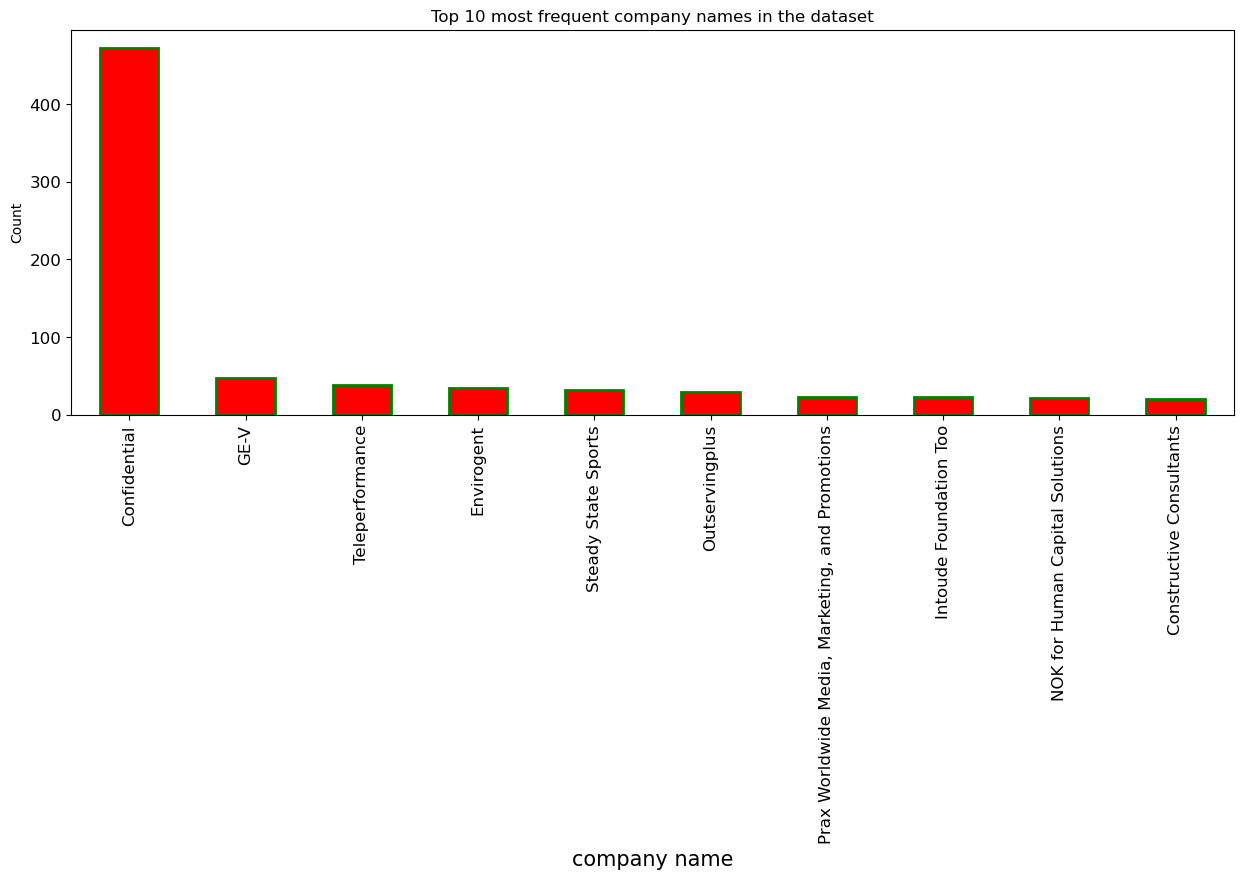

In [343]:
plt.figure(figsize = (15,5))
df["company_name"].value_counts().sort_values(ascending=False).head(10).plot.bar(color= "Red", fontsize=12, edgecolor='green',linewidth = 2)
plt.title("Top 10 most frequent company names in the dataset")
plt.xlabel("company name",fontsize=15)
plt.ylabel("Count")
plt.show()

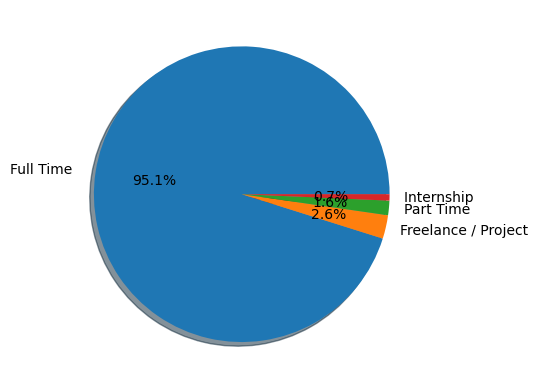

In [344]:
values =df["job_type"].value_counts()
plt.pie(values, labels = ["Full Time  ", "Freelance / Project ", "Part Time","Internship "],shadow = True,autopct="%1.1f%%")
plt.show()

In [345]:
import plotly.express as px
px.histogram(df,x='job_type',barmode='group', template='plotly_dark')
#full time jobs are the most frequent


In [346]:
df["job_type"].value_counts()

Full Time              4805
Freelance / Project     130
Part Time                80
Internship               35
Name: job_type, dtype: int64

In [347]:
df["city"].value_counts().sort_values(ascending=False).head(10)
#the most common jobs in cairo then Riyadh and so on 

Cairo          2180
Riyadh          830
Giza            699
Dubai           578
Alexandria      195
Kuwait City      92
Doha             85
Makkah           65
Sharqia          64
Al Rayyan        32
Name: city, dtype: int64

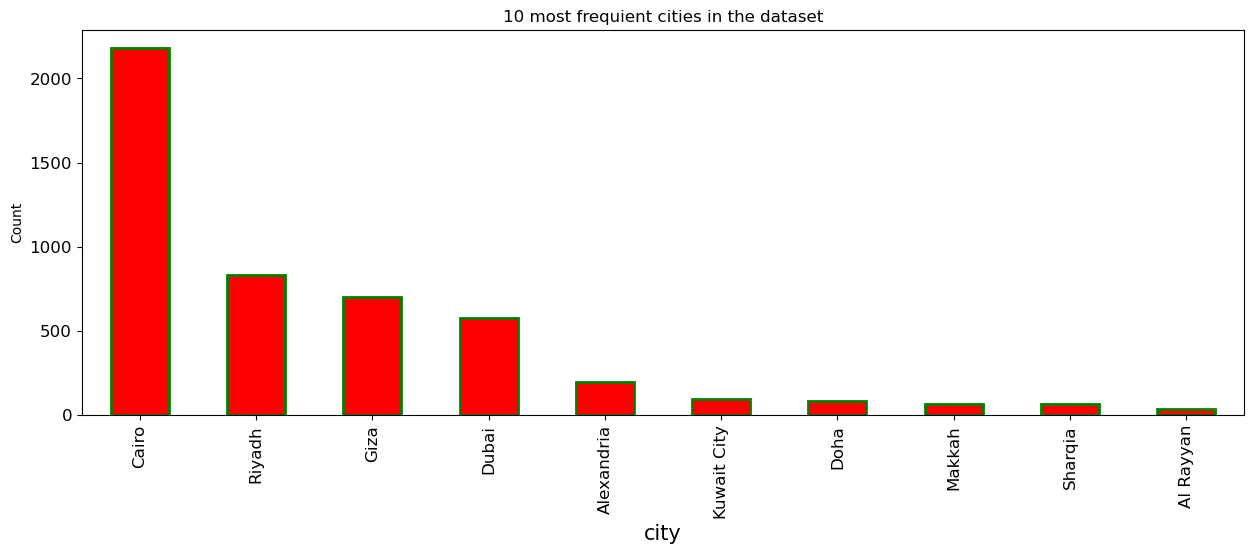

In [348]:
plt.figure(figsize = (15,5))
df["city"].value_counts().sort_values(ascending=False).head(10).plot.bar(color= "Red", fontsize=12, edgecolor='green',linewidth = 2)
plt.title("10 most frequient cities in the dataset")
plt.xlabel("city",fontsize=15)
plt.ylabel("Count")
plt.show()

In [349]:
df['country'].value_counts()[:10].index.tolist()
#the most common jobs in Egypt then Saudi Arabia and so on 

['Egypt',
 'Saudi Arabia',
 'United Arab Emirates',
 'Qatar',
 'Kuwait',
 'United States',
 'Australia',
 'India',
 'United Kingdom',
 'Jordan']

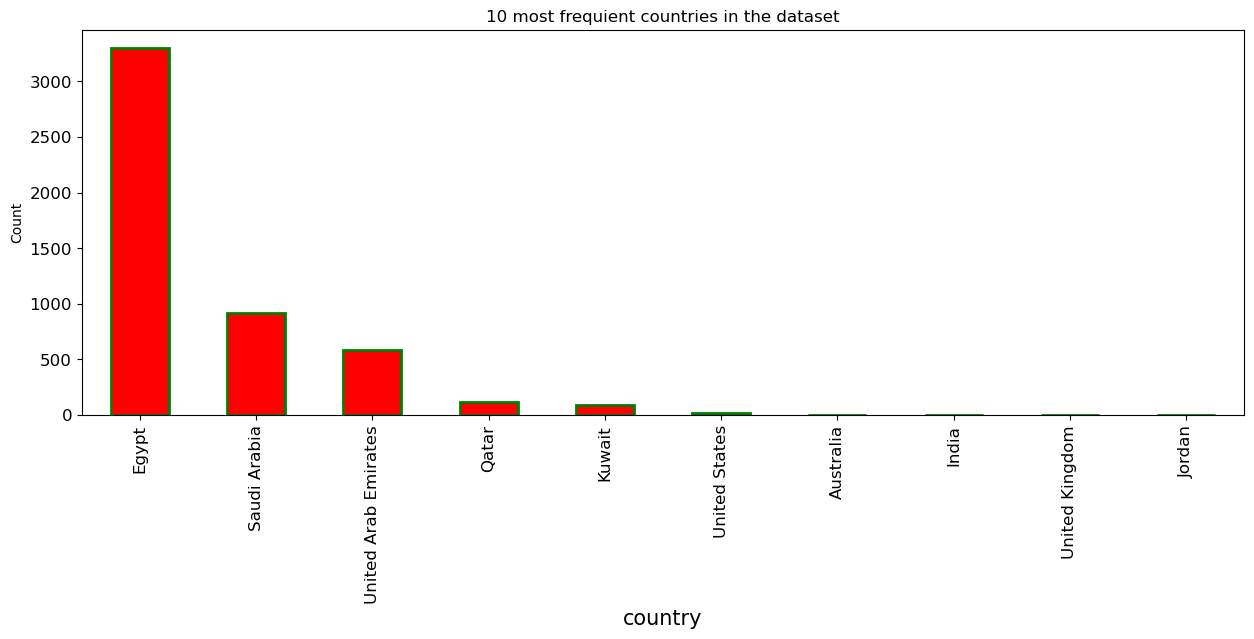

In [350]:
plt.figure(figsize = (15,5))
df["country"].value_counts().sort_values(ascending=False).head(10).plot.bar(color= "Red", fontsize=12, edgecolor='green',linewidth = 2)
plt.title("10 most frequient countries in the dataset")
plt.xlabel("country",fontsize=15)
plt.ylabel("Count")
plt.show()

In [351]:
df['area'].value_counts()[:10].index.tolist()
#the most common jobs in notmentioned areas  then Maadi and so on 

['Not mentioned',
 'Maadi',
 'New Cairo',
 'Nasr City',
 '6th of October',
 'Heliopolis',
 'Dokki',
 'Sheraton',
 '10th of Ramadan City',
 'Sheikh Zayed']

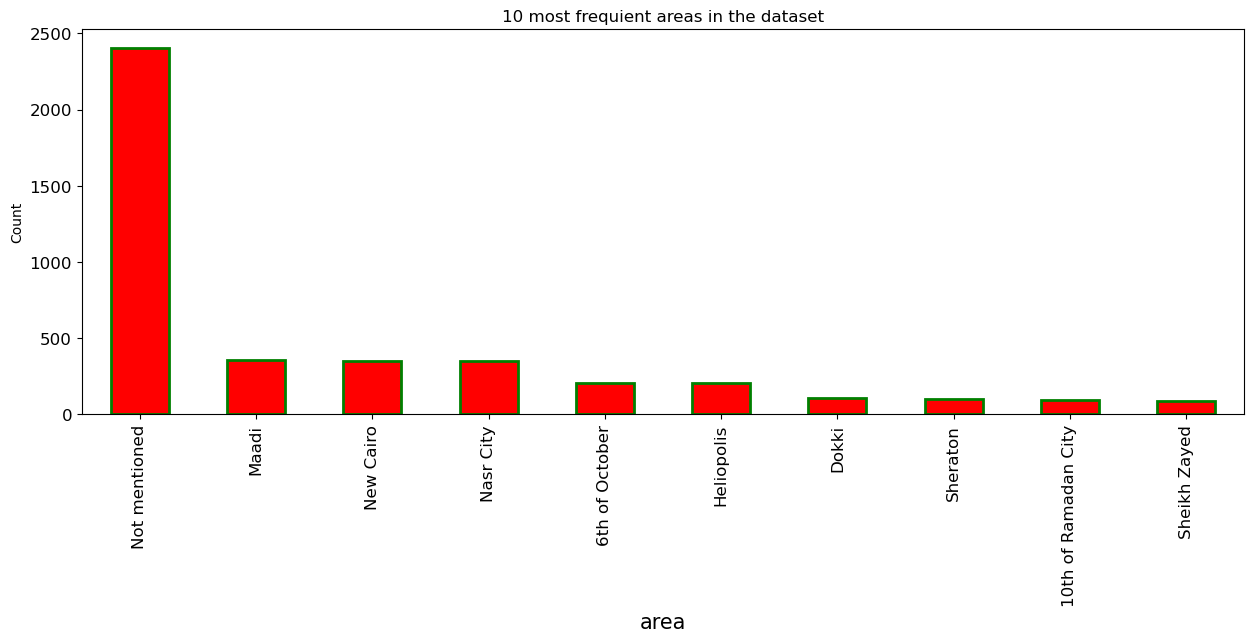

In [352]:
plt.figure(figsize = (15,5))
df["area"].value_counts().sort_values(ascending=False).head(10).plot.bar(color= "Red", fontsize=12, edgecolor='green',linewidth = 2)
plt.title("10 most frequient areas in the dataset")
plt.xlabel("area",fontsize=15)
plt.ylabel("Count")
plt.show()

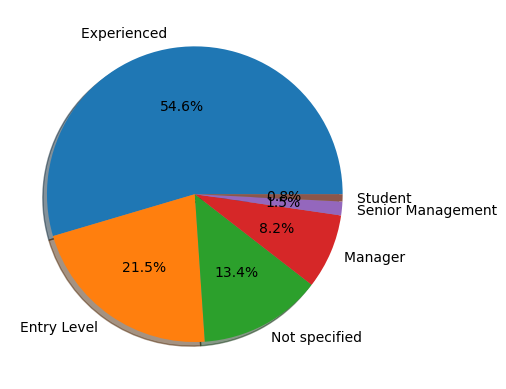

In [353]:
values =df["exp_level"].value_counts()
plt.pie(values, labels = ["Experienced ", "Entry Level ", "Not specified","Manager ","Senior Management","Student "],shadow = True,autopct="%1.1f%%")
plt.show()

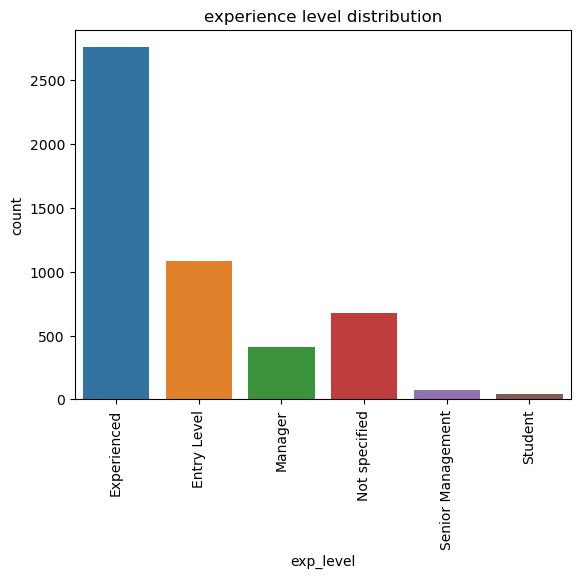

In [354]:
sns.countplot(x="exp_level",data=df)
plt.xticks(rotation=90)
plt.title("experience level distribution")
plt.show()


In [355]:
df["exp_level"].value_counts()
#the most common experience level required is Experienced

Experienced          2756
Entry Level          1086
Not specified         678
Manager               414
Senior Management      76
Student                40
Name: exp_level, dtype: int64

In [356]:
s= pd.DataFrame(df.groupby(['job_category', 'job_state']).count())
s
#we can notice that for example in AI and Machine Learning category the Hybrid state is the most demanded and so on

company_name  area  city  country  \
job_category                job_state                                          
AI and Machine Learning     Hybrid                   35    35    35       35   
                            Not Mentioned            45    45    45       45   
                            On-site                  97    97    97       97   
                            Remote                   17    17    17       17   
Administrative              Hybrid                   13    13    13       13   
...                                                 ...   ...   ...      ...   
Senior Software Engineering Remote                   29    29    29       29   
Software Engineering        Hybrid                  107   107   107      107   
                            Not Mentioned           118   118   118      118   
                            On-site                 423   423   423      423   
                            Remote                   60    60    60       60   

                                           job_type  exp_level  \
job_category                job_state                            
AI and Machine Learning     Hybrid               35         35   
                            Not Mentioned        45         45   
                            On-site              97         97   
                            Remote               17         17   
Administrative              Hybrid               13         13   
...                                             ...        ...   
Senior Software Engineering Remote               29         29   
Software Engineering        Hybrid              107        107   
                            Not Mentioned       118        118   
                            On-site             423        423   
                            Remote               60         60   

                                           Number of Experience Year  \
job_category                job_state                                  
AI and Machine Learning     Hybrid                                35   
                            Not Mentioned                         45   
                            On-site                               97   
                            Remote                                17   
Administrative              Hybrid                                13   
...                                                              ...   
Senior Software Engineering Remote                                29   
Software Engineering        Hybrid                               107   
                            Not Mentioned                        118   
                            On-site                              423   
                            Remote                                60   

                                           new_skills  programming_languages  \
job_category                job_state                                          
AI and Machine Learning     Hybrid                 35                     35   
                            Not Mentioned          45                     45   
                            On-site                97                     97   
                            Remote                 17                     17   
Administrative              Hybrid                 13                     13   
...                                               ...                    ...   
Senior Software Engineering Remote                 29                     29   
Software Engineering        Hybrid                107                    107   
                            Not Mentioned         118                    118   
                            On-site               423                    423   
                            Remote                 60                     60   

                                           frameworks  posting_date  
job_category                job_state                                
AI and Machine Learning  

In [357]:
r= pd.DataFrame(df.groupby(['job_category', 'job_type']).count())
r
#we deduce the num of job type required in each category

company_name  area  \
job_category                     job_type                                  
AI and Machine Learning          Freelance / Project             3     3   
                                 Full Time                     178   178   
                                 Internship                      2     2   
                                 Part Time                      11    11   
Administrative                   Freelance / Project            14    14   
                                 Full Time                     249   249   
                                 Part Time                       2     2   
Customer Service                 Freelance / Project             4     4   
                                 Full Time                     106   106   
                                 Internship                      1     1   
                                 Part Time                       2     2   
Cybersecurity                    Freelance / Project             1     1   
                                 Full Time                      20    20   
Data Science and Analytics       Full Time                      39    39   
Design and Creative              Freelance / Project             7     7   
                                 Full Time                     292   292   
                                 Internship                      1     1   
                                 Part Time                       3     3   
Devops and System Administration Full Time                      31    31   
Education and Training           Freelance / Project             2     2   
                                 Full Time                      68    68   
                                 Internship                     15    15   
Finance and Accounting           Freelance / Project             7     7   
                                 Full Time                     231   231   
                                 Internship                      2     2   
                                 Part Time                       4     4   
Internship                       Freelance / Project             2     2   
                                 Full Time                      41    41   
Management and Leadership        Freelance / Project            23    23   
                                 Full Time                     703   703   
                                 Internship                      3     3   
                                 Part Time                      12    12   
Other                            Freelance / Project            51    51   
                                 Full Time                    1623  1623   
                                 Internship                      5     5   
                                 Part Time                      17    17   
Production and Manufacturing     Full Time                      10    10   
                                 Part Time                       1     1   
Quality Assurance                Freelance / Project             1     1   
                                 Full Time                      23    23   
Sales and Marketing              Freelance / Project             4     4   
                                 Full Time                     238   238   
                                 Internship                      1     1   
                                 Part Time                       3     3   
Senior Software Engineering      Freelance / Project             1     1   
                                 Full Time                     273   273   
                                 Internship                      1     1   
                                 Part Time                      11    11   
Software Engineering             Freelance / Project            10    10   
                                 Full Time                     680   680   
                                 Internship                      4     4   
                          

In [358]:

fig= px.histogram(df,x='job_state',color='country',barmode='group',color_discrete_sequence=px.colors.sequential.Magenta,template='plotly_dark',title='Variation of job state with country')
fig.show()
#we notice that the first demand in egypt is onsite jobs and so on for the rest countries

In [359]:
fig= px.histogram(df,x='job_state',color='city',barmode='group',color_discrete_sequence=px.colors.sequential.Magenta,template='plotly_dark',title='Variation of job state  with city')
fig.show()
#we notice that the first demand in Alexandria is onsite jobs and can know the rest cities

In [360]:
fig= px.histogram(df,x='job_type',color='country',barmode='group',color_discrete_sequence=px.colors.sequential.Magenta,template='plotly_dark',title='Variation of job type with country')
fig.show()
#we notice that the first demand in egypt is full time jobs and so on for the rest countries

In [361]:
fig= px.histogram(df,x='job_category',color='country',barmode='group',color_discrete_sequence=px.colors.sequential.Magenta,template='plotly_dark',title='Variation of job category with country')
fig.show()
#the top categories in Egypt forexample is other then software engineering and so on.. 

In [362]:
fig= px.histogram(df,x='job_category',color='city',barmode='group',color_discrete_sequence=px.colors.sequential.Magenta,template='plotly_dark',title='Variation of job category with city')
fig.show()
# the top categories in Dubai for example is other then  management and leadership 

In [376]:
df[df["country"]=="Egypt"]["job_category"].value_counts().sort_values(ascending =False).head(10)
#top 10 jobs in Egypt

Other                          862
Software Engineering           562
Management and Leadership      480
Senior Software Engineering    256
Finance and Accounting         216
Sales and Marketing            198
Design and Creative            194
AI and Machine Learning        141
Administrative                 135
Education and Training          78
Name: job_category, dtype: int64

In [377]:
df[df["country"]=="Egypt"]["company_name"].value_counts().sort_values(ascending =False).head(10)
#top 10 hiring companies in Egypt

Confidential                       440
Teleperformance                     38
Outservingplus                      29
NOK for Human Capital Solutions     22
scandiweb                           18
Exco Egypt                          18
Alarabia Group                      16
LINK Development                    16
Intouch CX                          15
UCMAS Academy                       14
Name: company_name, dtype: int64

In [378]:
df["company_name"].value_counts().sort_values(ascending =False).head(10)
#top 10 companies not in Egypt only

Confidential                                       472
GE-V                                                47
Teleperformance                                     38
Envirogent                                          35
Steady State Sports                                 32
Outservingplus                                      29
Prax Worldwide Media, Marketing, and Promotions     23
Intoude Foundation Too                              23
NOK for Human Capital Solutions                     22
Constructive Consultants                            20
Name: company_name, dtype: int64

In [379]:
df[df["country"]=="Egypt"]["city"].value_counts().sort_values(ascending =False).head(10)
#top 10 cities that most hire in Egypt

Cairo         2180
Giza           699
Alexandria     195
Sharqia         64
Dakahlia        23
Monufya         16
Qalubia         15
Damietta        13
Suez            13
Ismailia        11
Name: city, dtype: int64

In [381]:
f= pd.DataFrame(round(df.groupby(['job_category'])["Number of Experience Year"].mean()))
f
#average experience years required for different category

,Number of Experience Year
job_category,
AI and Machine Learning,5.0
Administrative,4.0
Customer Service,4.0
Cybersecurity,5.0
Data Science and Analytics,4.0
Design and Creative,4.0
Devops and System Administration,4.0
Education and Training,4.0
Finance and Accounting,4.0


In [412]:
fig= px.histogram(df,x='job_category',color='exp_level',barmode='group',color_discrete_sequence=px.colors.sequential.Magenta,template='plotly_dark',title='Variation of job_state with exp level')
fig.show()
#average experience level required for different  category as student with internship

In [391]:
df["programming_languages"].value_counts().sort_values(ascending =False).head(10)
#top 10 programming languages required

[r]                                       4276
others                                     299
[sql, r]                                    98
[python, r]                                 49
[java, javascript, r, java]                 39
[java, r, java]                             28
[java, javascript, r, html, css, java]      25
[r, html, css]                              17
[r, php]                                    16
[java, javascript, r, css, java]            15
Name: programming_languages, dtype: int64

In [396]:
fig= px.histogram(df,x='exp_level',color='job_state',barmode='group',color_discrete_sequence=px.colors.sequential.Magenta,template='plotly_dark',title='Variation of job_state with exp level')
fig.show()
#we notice that the most freq between experienced is working onsite 

<AxesSubplot:xlabel='Number of Experience Year', ylabel='Density'>

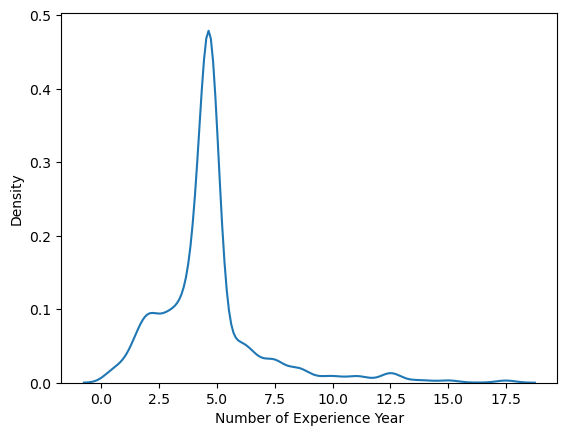

In [406]:
sns.kdeplot(df["Number of Experience Year"])
#distribution of exp years

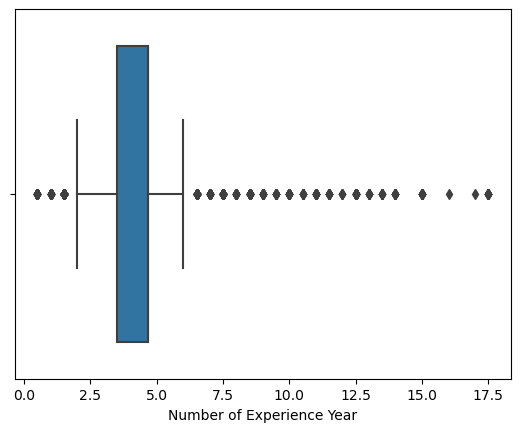

In [405]:
sns.boxplot(x="Number of Experience Year",data=df)
plt.show()
#17 years of experience is not outlier

In [414]:
df.to_csv("WUZZUF_final")

In [411]:
df.describe(include='object')
#we can deduce that the top job_title is the Graphic Designer,top company_name,top job_type,top job_state,top skills required in the dataset and so on..

,company_name,area,city,country,job_type,job_state,exp_level,job_category,new_skills,programming_languages,frameworks
count,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050,5050
unique,1973,123,70,20,4,4,6,17,3920,62,18
top,Confidential,Not mentioned,Cairo,Egypt,Full Time,On-site,Experienced,Other,"[administration, microsoft, office, admin, typ...",[r],not found
freq,472,2405,2180,3298,4805,2674,2756,1696,140,4276,4937
